In [ ]:
import scipy.io
C1=scipy.io.loadmat('/content/drive/MyDrive/S2T2B1.mat')
C2=scipy.io.loadmat('/content/drive/MyDrive/S2T2B2.mat')

In [ ]:
sorted(C1.keys()),sorted(C2.keys())

(['__globals__', '__header__', '__version__', 'a'],
 ['__globals__', '__header__', '__version__', 'a'])

In [ ]:
print(C1['a'].shape)
print(C2['a'].shape)

(45, 126, 3500)
(45, 126, 3500)


In [ ]:
import numpy as np
face=np.array(C1['a'])
piano=np.array(C2['a'])
all_data=np.concatenate((face,piano),axis=0)
face_label=np.zeros((45))
piano_label=np.ones((45))
label=np.concatenate((face_label,piano_label),axis=-1)

In [ ]:
print(all_data.shape)
print(label.shape)
print(label)

(90, 126, 3500)
(90,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from scipy import stats
def mean(x):
  return np.mean(x, axis=-1)
def std(x):
  return np.std(x, axis=-1)
def ptp(x):
  return np.ptp(x, axis=-1)
def var(x):
  return np.var(x, axis=-1)
def minim(x):
  return np.min(x, axis=-1)
def maxim(x):
  return np.max(x, axis=-1)  
def argminim(x):
  return np.argmin(x, axis=-1)
def argmaxim(x):
  return np.argmax(x, axis=-1)
def rms(x):
  return np.sqrt(np.mean(x**2, axis=-1)) 
def abs_diff_signal(x):
  return np.sum(np.abs(np.diff(x, axis=-1)),axis=-1)
def skewness(x):
  return stats.skew(x, axis=-1)
def kurtosis(x):
  return stats.kurtosis(x, axis=-1)
def concatenate_features(x):
  return np.concatenate((mean(x),std(x),ptp(x),var(x),minim(x),maxim(x),
                         argminim(x),argmaxim(x),rms(x),abs_diff_signal(x),skewness(x),kurtosis(x)),axis=-1)  

In [ ]:
print(all_data.shape)
features=[]
  
for i in range(100):
  if (i != 99):
    pack_data=all_data[:,:,35*i:35*i+40]
  else:
    pack_data=all_data[:,:,35*i:3500]
  
  for d in pack_data:
    features.append(concatenate_features(d))




(90, 126, 3500)


In [ ]:
features_array=np.array(features)
features_array.shape

(9000, 1512)

In [ ]:
# Classification 
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tqdm.auto import tqdm
import warnings
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
warnings.filterwarnings("ignore")
clf=KNeighborsClassifier(3)
target_names1 = ["face", "piano"]
clf=KNeighborsClassifier(3)

for i in range(100):
   X_train, X_test, y_train, y_test = train_test_split(features_array[i*90:(i+1)*90,:], label ,
                                                       test_size=0.20, random_state=None)
   scaler = StandardScaler()
   X_train = scaler.fit_transform(X_train)
   X_test = scaler.transform(X_test)
   y_pred = clf.fit(X_train, y_train).predict(X_test)
   acc.append(accuracy_score(y_test,y_pred))

print(np.array(acc).shape)

(15000,)


In [ ]:
acc_array=np.array(acc)
acc_mat=np.zeros((150,100))
for i in range(150):
  acc_mat[i,:]=acc_array[i*100:(i+1)*100]


In [ ]:
mean_acc=np.mean(acc_mat,axis=0)
mean_acc.shape

(100,)

In [ ]:
x=list(range(0,100))
x_array=35*np.array(x)+20
x_array

array([  20,   55,   90,  125,  160,  195,  230,  265,  300,  335,  370,
        405,  440,  475,  510,  545,  580,  615,  650,  685,  720,  755,
        790,  825,  860,  895,  930,  965, 1000, 1035, 1070, 1105, 1140,
       1175, 1210, 1245, 1280, 1315, 1350, 1385, 1420, 1455, 1490, 1525,
       1560, 1595, 1630, 1665, 1700, 1735, 1770, 1805, 1840, 1875, 1910,
       1945, 1980, 2015, 2050, 2085, 2120, 2155, 2190, 2225, 2260, 2295,
       2330, 2365, 2400, 2435, 2470, 2505, 2540, 2575, 2610, 2645, 2680,
       2715, 2750, 2785, 2820, 2855, 2890, 2925, 2960, 2995, 3030, 3065,
       3100, 3135, 3170, 3205, 3240, 3275, 3310, 3345, 3380, 3415, 3450,
       3485])

Text(0, 0.5, 'Accuracy')

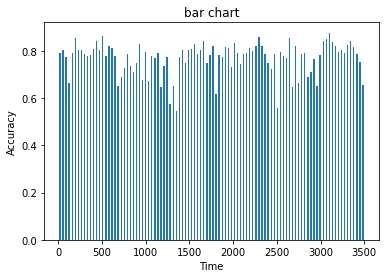

In [ ]:
plt.bar(x_array,mean_acc,width=15)
plt.title('bar chart')
plt.xlabel('Time') 
plt.ylabel('Accuracy')

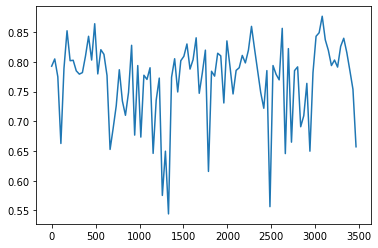

In [ ]:
plt.plot(x_array,mean_acc)
plt.xlabel('Time') 
plt.ylabel('Accuracy')

In [ ]:
print('maximum accuracy is: ' , np.max(mean_acc))
print('maximum accuracy ocuurs between samples: ', [np.argmax(mean_acc)*35,np.argmax(mean_acc)*35+40])
print('maximum accuracy ocuurs between times: ', [(np.argmax(mean_acc)*35)/500,(np.argmax(mean_acc)*35+40)/500])


maximum accuracy is:  0.8766666666666652
maximum accuracy ocuurs between samples:  [3080, 3120]
maximum accuracy ocuurs between times:  [6.16, 6.24]
